In [1]:
%pip install scikit-learn
%pip install pandas
# %pip install opencv-contrib-python==4.5.3.56
%pip install pillow
%pip install scikit-image
%pip install ipywidgets
%pip install ace-tools
%pip install matplotlib
%pip install torch
%pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
# python3 -m pip install opencv-python==4.6.0.66 --verbose

In [3]:
# %pip install opencv-contrib-python==4.5.3.56


In [4]:
import cv2
from PIL import Image, ImageEnhance
from skimage import img_as_float
import time
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from sklearn.decomposition import PCA
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import skimage.restoration as restoration
from scipy.signal import wiener
from skimage import img_as_float
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import load_digits
from skimage.feature import hog, local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import KFold

# Task 1 - Data Preparation

In [5]:
digits = load_digits()

X = np.array(digits.images)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples, nx * ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples, nx * ny))

# Task 2 - Classification using kNN

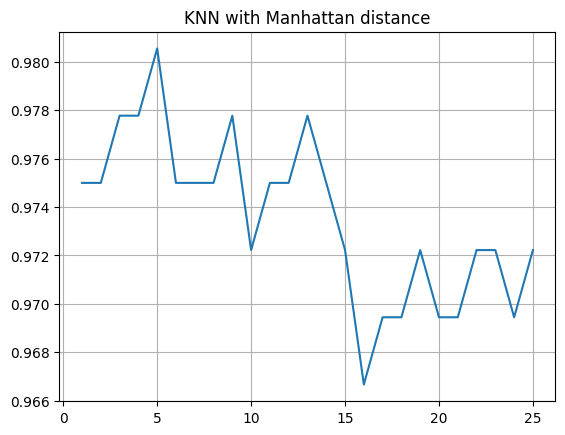

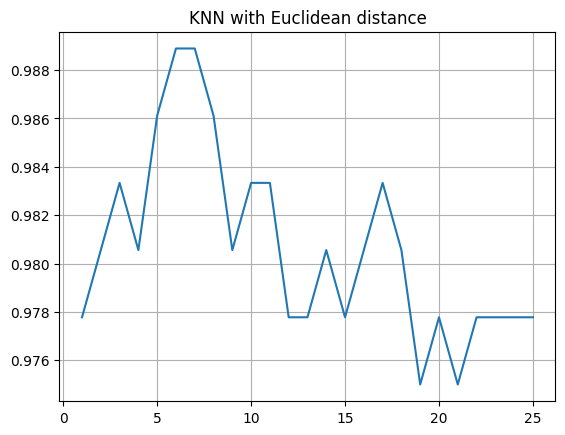

In [6]:
k_range = list(range(1, 26))
mnht_scores = []
ecld_scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i, p = 1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mnht_scores.append(accuracy_score(y_test, y_pred))
    knn = KNeighborsClassifier(n_neighbors = i, p = 2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    ecld_scores.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, mnht_scores)
plt.grid(True)
plt.title("KNN with Manhattan distance")
plt.show()
plt.plot(k_range, ecld_scores)
plt.grid(True)
plt.title("KNN with Euclidean distance")
plt.show()

In [7]:
knn = KNeighborsClassifier(n_neighbors = 6, p = 2)
start_time_knn = time.time()
knn.fit(X_train, y_train)
knn_training_time = time.time() - start_time_knn
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average = 'macro'))
print("Recall: ", recall_score(y_test, y_pred, average = 'macro'))
print("F-score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy:  0.9888888888888889
Precision:  0.9904028005091835
Recall:  0.9899311639549436
F-score:  0.9900986152362391


# Task 3 - Building and Training a Neural Network

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import cv2
# from google.colab.patches import cv2_imshow

train_dataset = TensorDataset(torch.tensor(X_train.reshape(X_train.shape[0], 1, 8, 8), dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_test.reshape(X_test.shape[0], 1, 8, 8), dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

# train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
# val_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [9]:
t_data = DataLoader(train_dataset, 128, shuffle=True)
val_data = DataLoader(val_dataset, 128, shuffle=True)

obj = next(iter(t_data))
print(len(obj[1]))
print(obj[1])
print(obj[0].shape)

def show_image(image):
  image = image.numpy().reshape(8,8)
  print(image.shape)
  # image = image.numpy().squeeze()
  image = (image - image.min()) / (image.max() - image.min()) * 255
  image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR)
  # cv2_imshow(image)

show_image(obj[0][0])

128
tensor([2, 5, 2, 7, 4, 9, 8, 5, 4, 5, 9, 9, 5, 4, 8, 3, 4, 9, 4, 3, 9, 0, 4, 3,
        1, 5, 2, 9, 5, 5, 9, 0, 7, 7, 6, 3, 5, 0, 7, 1, 1, 0, 1, 9, 8, 8, 7, 7,
        0, 3, 5, 8, 9, 1, 0, 7, 3, 6, 2, 7, 9, 3, 3, 0, 5, 3, 3, 9, 3, 3, 9, 1,
        4, 8, 0, 5, 9, 7, 1, 2, 2, 2, 7, 4, 7, 5, 6, 1, 3, 9, 3, 7, 6, 0, 0, 3,
        3, 4, 7, 8, 7, 7, 0, 4, 3, 9, 8, 0, 4, 7, 2, 1, 0, 0, 9, 5, 6, 0, 0, 3,
        3, 3, 0, 2, 8, 3, 1, 3])
torch.Size([128, 1, 8, 8])
(8, 8)


In [10]:
class PredictMNIST(nn.Module):
  def __init__(self):
    super(PredictMNIST, self).__init__()
    self.c1 = nn.Conv2d(1, 32, 3, 1, 1)
    self.bn1 = nn.BatchNorm2d(32)
    self.c2 = nn.Conv2d(32, 64, 3, 1, 1)
    self.bn2 = nn.BatchNorm2d(64)
    self.dropout = nn.Dropout(0.4)
    self.l1 = nn.Linear(256, 128)
    self.l2 = nn.Linear(128, 10)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

  def forward(self, inp):
    inp = self.pool(torch.relu(self.bn1(self.c1(inp))))
    inp = self.pool(torch.relu(self.bn2(self.c2(inp))))
    inp = torch.flatten(inp, 1)
    inp = torch.relu(self.l1(inp))
    inp = self.dropout(inp)
    inp = torch.relu(self.l2(inp))
    return inp


In [11]:
model = PredictMNIST()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
import torch
from tqdm import tqdm

epochs = 20

train_accuracy = []
train_losses = []

val_accuracy = []
val_losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

start_time_nn = time.time()
for epoch in range(epochs):
    model.train()

    epoch_loss = 0
    correct = 0
    total = 0

    for images, labels in tqdm(t_data):
        # print(images.shape)
        images, labels = images.to(device), labels.to(device)

        o = model(images)
        l = loss(o, labels)

        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        epoch_loss += l.item()

        _, pred = o.max(1)
        correct += (pred == labels).sum().item()
        total += labels.size(0)

    train_accuracy.append(correct / total)
    train_losses.append(epoch_loss)

    print(f"Train Accuracy: {train_accuracy[-1]:.4f}, Train Loss: {train_losses[-1]:.4f}")

    model.eval()

    val_loss = 0
    val_correct = 0
    val_total = 0

    val_preds = []
    val_labels = []

    with torch.no_grad():
        for images, labels in tqdm(val_data):
            images, labels = images.to(device), labels.to(device)

            o = model(images)
            l = loss(o, labels)

            _, pred = o.max(1)

            val_loss += l.item()
            val_correct += (pred == labels).sum().item()
            val_total += labels.size(0)

            val_preds.extend(pred.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_accuracy.append(val_correct / val_total)
    val_losses.append(val_loss)

    val_precision = precision_score(val_labels, val_preds, average='macro')
    val_recall = recall_score(val_labels, val_preds, average='macro')
    val_f1 = f1_score(val_labels, val_preds, average='macro')

    print(f"Val Accuracy: {val_accuracy[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
nn_training_time = time.time() - start_time_nn

100%|██████████| 12/12 [00:00<00:00, 14.39it/s]


Train Accuracy: 0.3473, Train Loss: 24.4776


100%|██████████| 3/3 [00:00<00:00, 50.88it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Val Accuracy: 0.6444, Val Loss: 5.2469


100%|██████████| 12/12 [00:00<00:00, 12.30it/s]


Train Accuracy: 0.6200, Train Loss: 16.8655


100%|██████████| 3/3 [00:00<00:00, 35.31it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Val Accuracy: 0.8167, Val Loss: 3.0610


100%|██████████| 12/12 [00:00<00:00, 13.27it/s]


Train Accuracy: 0.8038, Train Loss: 9.8885


100%|██████████| 3/3 [00:00<00:00, 23.69it/s]


Val Accuracy: 0.9667, Val Loss: 1.3135


100%|██████████| 12/12 [00:00<00:00, 20.88it/s]


Train Accuracy: 0.9241, Train Loss: 4.5654


100%|██████████| 3/3 [00:00<00:00, 79.99it/s]


Val Accuracy: 0.9778, Val Loss: 0.5713


100%|██████████| 12/12 [00:01<00:00, 10.73it/s]


Train Accuracy: 0.9603, Train Loss: 2.6615


100%|██████████| 3/3 [00:00<00:00, 31.85it/s]


Val Accuracy: 0.9861, Val Loss: 0.3390


100%|██████████| 12/12 [00:00<00:00, 25.58it/s]


Train Accuracy: 0.9729, Train Loss: 1.8567


100%|██████████| 3/3 [00:00<00:00, 46.85it/s]


Val Accuracy: 0.9889, Val Loss: 0.2200


100%|██████████| 12/12 [00:00<00:00, 26.28it/s]


Train Accuracy: 0.9826, Train Loss: 1.2607


100%|██████████| 3/3 [00:00<00:00, 53.20it/s]


Val Accuracy: 0.9861, Val Loss: 0.1795


100%|██████████| 12/12 [00:00<00:00, 33.39it/s]


Train Accuracy: 0.9875, Train Loss: 0.8921


100%|██████████| 3/3 [00:00<00:00, 89.31it/s]


Val Accuracy: 0.9917, Val Loss: 0.1503


100%|██████████| 12/12 [00:00<00:00, 50.02it/s]


Train Accuracy: 0.9910, Train Loss: 0.6761


100%|██████████| 3/3 [00:00<00:00, 114.03it/s]


Val Accuracy: 0.9917, Val Loss: 0.1488


100%|██████████| 12/12 [00:00<00:00, 51.67it/s]


Train Accuracy: 0.9896, Train Loss: 0.6238


100%|██████████| 3/3 [00:00<00:00, 111.18it/s]


Val Accuracy: 0.9917, Val Loss: 0.1096


100%|██████████| 12/12 [00:00<00:00, 52.89it/s]


Train Accuracy: 0.9930, Train Loss: 0.5054


100%|██████████| 3/3 [00:00<00:00, 95.13it/s]


Val Accuracy: 0.9972, Val Loss: 0.0965


100%|██████████| 12/12 [00:00<00:00, 48.96it/s]


Train Accuracy: 0.9944, Train Loss: 0.4034


100%|██████████| 3/3 [00:00<00:00, 96.90it/s]


Val Accuracy: 0.9944, Val Loss: 0.0852


100%|██████████| 12/12 [00:00<00:00, 52.62it/s]


Train Accuracy: 0.9958, Train Loss: 0.3848


100%|██████████| 3/3 [00:00<00:00, 78.67it/s]


Val Accuracy: 0.9889, Val Loss: 0.1016


100%|██████████| 12/12 [00:00<00:00, 44.96it/s]


Train Accuracy: 0.9972, Train Loss: 0.3240


100%|██████████| 3/3 [00:00<00:00, 83.36it/s]


Val Accuracy: 0.9917, Val Loss: 0.0844


100%|██████████| 12/12 [00:00<00:00, 41.06it/s]


Train Accuracy: 0.9993, Train Loss: 0.2280


100%|██████████| 3/3 [00:00<00:00, 78.76it/s]


Val Accuracy: 0.9944, Val Loss: 0.0755


100%|██████████| 12/12 [00:00<00:00, 43.37it/s]


Train Accuracy: 1.0000, Train Loss: 0.1995


100%|██████████| 3/3 [00:00<00:00, 72.52it/s]


Val Accuracy: 0.9944, Val Loss: 0.0641


100%|██████████| 12/12 [00:00<00:00, 49.31it/s]


Train Accuracy: 0.9965, Train Loss: 0.1976


100%|██████████| 3/3 [00:00<00:00, 115.07it/s]


Val Accuracy: 0.9972, Val Loss: 0.0674


100%|██████████| 12/12 [00:00<00:00, 46.56it/s]


Train Accuracy: 0.9993, Train Loss: 0.1998


100%|██████████| 3/3 [00:00<00:00, 88.72it/s]


Val Accuracy: 0.9889, Val Loss: 0.0787


100%|██████████| 12/12 [00:00<00:00, 50.70it/s]


Train Accuracy: 0.9986, Train Loss: 0.1665


100%|██████████| 3/3 [00:00<00:00, 105.67it/s]


Val Accuracy: 0.9944, Val Loss: 0.0668


100%|██████████| 12/12 [00:00<00:00, 48.08it/s]


Train Accuracy: 0.9993, Train Loss: 0.1508


100%|██████████| 3/3 [00:00<00:00, 107.95it/s]

Val Accuracy: 0.9944, Val Loss: 0.0607


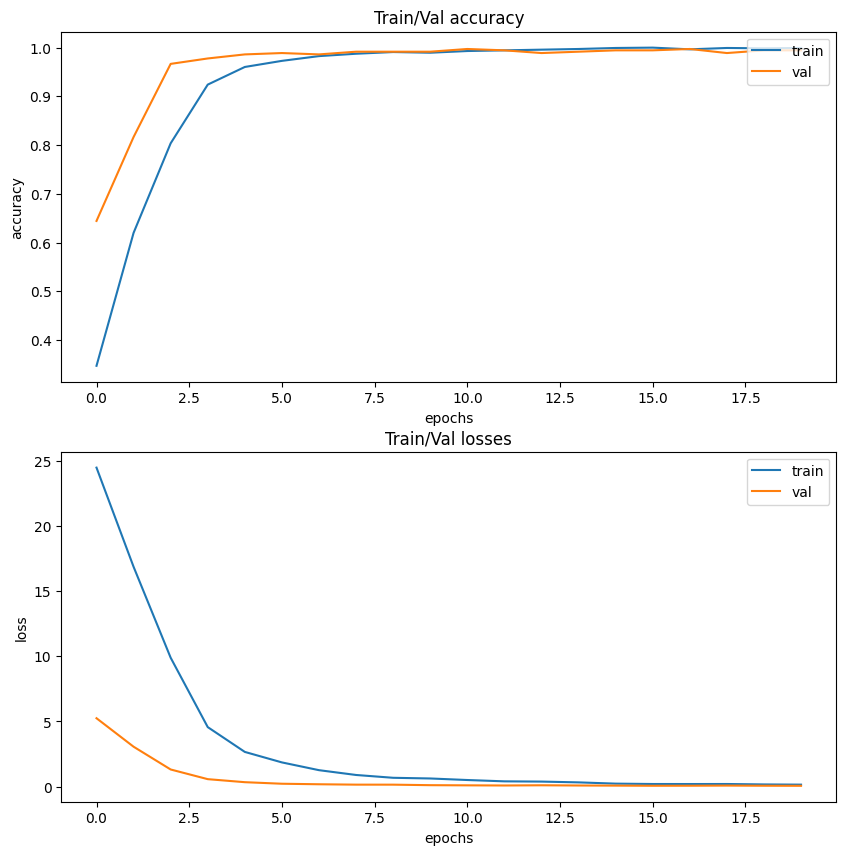

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].plot(range(epochs), train_accuracy, label="train")
ax[0].plot(range(epochs), val_accuracy, label="val")
ax[0].title.set_text("Train/Val accuracy")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("accuracy")
ax[0].legend(loc="upper right")

ax[1].plot(range(epochs), train_losses, label="train")
ax[1].plot(range(epochs), val_losses, label="val")
ax[1].title.set_text("Train/Val losses")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("loss")
ax[1].legend()

# Task 4 - Comparative Analysis of Models

In [14]:

print("For KNN: \n Val Accuracy: {:.5f}, \n Recall: {:.5f}, \n Precision: {:.5f}, \n F1-score: {:.5f}, \n Training Time: {:.5f}, \n Parameters: {:.5f}".format(accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average = 'macro'), precision_score(y_test, y_pred, average = 'macro'), f1_score(y_test, y_pred, average = 'macro'), knn_training_time, 0))

print("For Neural Network: \n Val Accuracy: {:.5f}, \n Recall: {:.5f}, \n Precision: {:.5f}, \n F1-score: {:.5f}, \n Training Time: {:.5f}, \n Parameters: {:.5f}".format(val_accuracy[-1], val_recall, val_precision, val_f1, nn_training_time, sum(p.numel() for p in model.parameters() if p.requires_grad)))



For KNN: 
 Val Accuracy: 0.98889, 
 Recall: 0.98993, 
 Precision: 0.99040, 
 F1-score: 0.99010, 
 Training Time: 0.00237, 
 Parameters: 0.00000
For Neural Network: 
 Val Accuracy: 0.99444, 
 Recall: 0.99412, 
 Precision: 0.99548, 
 F1-score: 0.99473, 
 Training Time: 10.26296, 
 Parameters: 53194.00000


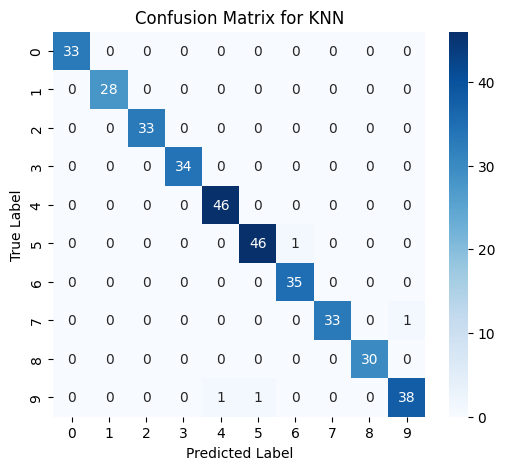

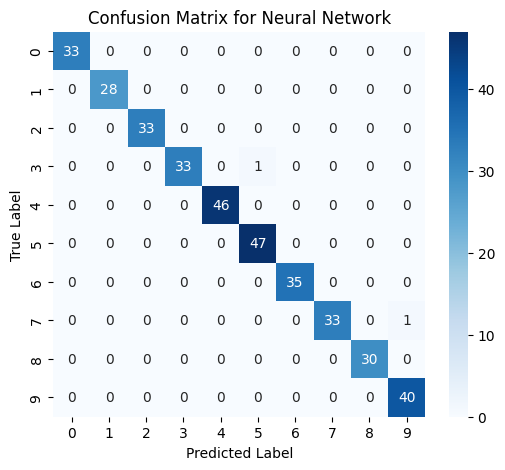

In [15]:
import seaborn as sns

knn_cm = confusion_matrix(y_test, y_pred)
nn_cm = confusion_matrix(val_labels, val_preds)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(knn_cm, "Confusion Matrix for KNN")
plot_confusion_matrix(nn_cm, "Confusion Matrix for Neural Network")
